In [153]:
import pandas as pd
import numpy as np
from mplsoccer import Radar, FontManager, grid
import matplotlib.pyplot as plt
import re
import traceback

In [2]:
import mplsoccer
mplsoccer.__file__

'/Users/yannis/opt/anaconda3/lib/python3.8/site-packages/mplsoccer/__init__.py'

In [ ]:
####### ADD THIS FOLLOWING FUNCTION INTO THE RADAR_CHART.PY SCRIPT IN THE PACKAGE FOLDER

# def draw_under_param_labels(self, text_list, ax=None, wrap=15, offset=1, **kwargs):
#         """ Draw the parameter labels (e.g. 'Key Passes') on the edge of the chart.

#         Parameters
#         ----------
#         ax : matplotlib axis, default None
#             The axis to plot on.
#         offset : float, default 1
#             Offset the param labels from the last of the rings.
#         wrap : int, default 15
#             Wrap the labels so that every line is at most ``wrap`` characters long
#             (long words are not broken).
#         **kwargs : All other keyword arguments are passed on to matplotlib.axes.Axes.text.

#         Returns
#         -------
#         label_list : list of matplotlib.text.Text

#         Examples
#         --------
#         >>> from mplsoccer import Radar
#         >>> radar = Radar(params=['Agility', 'Speed', 'Strength'], min_range=[0, 0, 0], \
#                           max_range=[10, 10, 10])
#         >>> fig, ax = radar.setup_axis()
#         >>> rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')
#         >>> values = [5, 3, 10]
#         >>> radar_poly, rings, vertices = radar.draw_radar(values, ax=ax, \
#                                                            kwargs_radar={'facecolor': '#00f2c1', \
#                                                                          'alpha': 0.6}, \
#                                                            kwargs_rings={'facecolor': '#d80499', \
#                                                                          'alpha': 0.6})
#         >>> range_labels = radar.draw_range_labels(ax=ax)
#         >>> param_labels = radar.draw_param_labels(ax=ax)
#         """
#         validate_ax(ax)
#         # calculate how far out from the center (radius) to place each label, convert to coordinates
#         # default places one-and-a-half units (offset) away from the edge of the last circle

#         param_radius = self.outer_ring + offset - 0.5
#         param_xs = param_radius * self.rotation_sin
#         param_ys = param_radius * self.rotation_cos
#         label_list = []
#         # write the labels on the axis
#         for idx, label in enumerate(text_list):
#             if wrap is not None:
#                 label = '\n'.join(textwrap.wrap(label, wrap, break_long_words=False))
#             text = ax.text(param_xs[idx], param_ys[idx], label,
#                            rotation=self.rotation_degrees[idx], ha='center', va='center', **kwargs)
#             label_list.append(text)
#         return label_list

In [3]:
# Display all columns of pandas DataFrames
pd.set_option('display.max_columns', None)

In [4]:
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

## Load data

In [48]:
# df = pd.read_csv("../../../data/export/unified_fbref_tm_capology.csv")
df_all = pd.read_csv("../../../data/fbref/engineered/outfield/fbref_outfield_player_stats_combined_latest.csv")

In [49]:
df_all

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1,Matches,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,npxG/Sh,G-xG,np:G-xG,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,Att.1,Cmp%.1,Cmp.2,Att.2,Cmp%.2,Cmp.3,Att.3,Cmp%.3,A-xA,KP,1/3,PPA,CrsPA,Prog,Live,Dead,TB,Press,Sw,Crs,CK,In,Out,Str,Ground,Low,High,Left,Right,Head,TI,Other,Off,Out.1,Int,Blocks,SCA,SCA90,PassLive,PassDead,Drib,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Tkl%,Past,Succ,%,Def 3rd.1,Mid 3rd.1,Att 3rd.1,ShSv,Pass,Tkl+Int,Clr,Err,Touches,Def Pen,Att Pen,Succ%,#Pl,Megs,Carries,CPA,Mis,Dis,Targ,Rec,Rec%,Prog.1,Mn/MP,Min%,Mn/Start,Compl,Subs,Mn/Sub,unSub,PPM,onG,onGA,+/-,+/-90,On-Off,onxG,onxGA,xG+/-,xG+/-90,On-Off.1,2CrdY,Fls,PKwon,PKcon,OG,Recov,Won,Lost,Won%,League Name,League ID,Season,xAG,npxG+xAG,PrgC,PrgP,PrgR,G+A.1,xAG.1,xG+xAG,npxG+xAG.1,A-xAG,TO,TO.1,Tkld,Tkld%,Team Name,Team Country,Player Lower,First Name Lower,Last Name Lower,First Initial Lower,Team Country Lower,Nationality Code,Nationality Cleaned,Primary Pos,Position Grouped,Outfielder Goalkeeper
0,Aaron Cresswell,eng ENG,DF,West Ham,Premier League,27,1989.0,36,35,3069,34.1,1,3,1,0,0,7,0,0.03,0.09,0.12,0.03,0.12,0.8,0.8,2.8,3.6,0.02,0.08,0.10,0.02,0.10,Matches,21.0,6,28.6,0.62,0.18,0.05,0.17,28.1,8.0,0.04,0.2,0.2,1224.0,1708.0,71.7,23519.0,10212.0,560.0,623.0,89.9,472.0,587.0,80.4,183.0,449.0,40.8,0.2,35.0,117.0,21.0,14.0,96.0,1343.0,365.0,1.0,222.0,83.0,93.0,67.0,35.0,15.0,9.0,893.0,293.0,522.0,1329.0,78.0,59.0,210.0,5.0,15.0,44.0,39.0,52.0,62.0,1.82,35.0,21.0,1.0,3.0,0.0,9.0,0.26,6.0,3.0,0.0,0.0,0.0,0.0,38.0,18.0,15.0,18.0,5.0,17.0,53.1,15.0,115.0,32.1,181.0,123.0,54.0,0.0,38.0,90.0,133.0,0.0,2050.0,125.0,17.0,33.3,7.0,0.0,1071.0,2.0,18.0,19.0,1171.0,1094.0,93.4,31.0,85,89.7,NaN,30.0,1,NaN,1,1.14,45.0,60.0,-15.0,-0.44,0.84,38.0,51.5,-13.5,-0.40,1.09,0.0,20,0.0,0.0,0.0,277.0,70.0,57.0,55.1,Big-5-European-Leagues,Big5,2017-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Ham,England,aaron cresswell,aaron,cresswell,a,england,ENG,England,DF,Defender,Outfielder
1,Aaron Hunt,de GER,"MF,FW",Hamburger SV,Bundeliga,30,1986.0,28,26,2081,23.1,3,2,2,1,1,1,0,0.13,0.09,0.22,0.09,0.17,2.8,2.1,5.6,7.6,0.12,0.23,0.35,0.09,0.32,Matches,27.0,6,22.2,1.17,0.26,0.07,0.33,23.4,10.0,0.08,0.2,-0.1,883.0,1229.0,71.8,16889.0,5315.0,406.0,480.0,84.6,292.0,376.0,77.7,165.0,303.0,54.5,-3.6,65.0,83.0,31.0,5.0,97.0,977.0,252.0,11.0,245.0,67.0,66.0,123.0,35.0,41.0,14.0,672.0,236.0,321.0,999.0,137.0,42.0,23.0,9.0,5.0,29.0,29.0,49.0,102.0,4.25,54.0,43.0,1.0,2.0,1.0,6.0,0.25,5.0,1.0,0.0,0.0,0.0,0.0,30.0,22.0,12.0,16.0,2.0,5.0,13.5,32.0,135.0,27.9,102.0,261.0,121.0,0.0,28.0,44.0,21.0,0.0,1475.0,28.0,68.0,58.3,23.0,4.0,892.0,7.0,45.0,42.0,1176.0,893.0,75.9,178.0,74,68.0,NaN,14.0,2,NaN,0,1.07,22.0,34.0,-12.0,-0.52,0.58,27.0,31.3,-4.3,-0.18,0.94,0.0,27,0.0,0.0,0.0,213.0,22.0,37.0,37.3,Big-5-European-Leagues,Big5,2017-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hamburger SV,Germany,aaron hunt,aaron,hunt,a,germany,GER,Germany,MF,Midfielder,Outfielder
2,Aaron Lennon,eng ENG,MF,Burnley,Premier League,30,1987.0,14,13,1118,12.4,0,2,0,0,0,2,0,0.00,0.16,0.16,0.00,0.16,0.6,0.6,1.4,2.0,0.05,0.11,0.16,0.05,0.16,Matches,10.0,4,40.0,0.81,0.32,0.00,0.00,16.6,0.0,0.06,-0.6,-0.6,204.0,294.0,69.4,3223.0,887.0,116.0,142.0,81.7,68.0,92.0,73.9,17.0,34.0,50.0,0.6,8.0,11.0,13.0,5.0,22.0,289.0,5.0,0.0,61.0,5.0,19.0,0.0,0.0,0.0,0.0,193.0,51.0,50.0,27.0,250.0,7.0,4.0,3.0,0.0,9.0,8.0,30.0,18.0,1.45,12.0,0.0,1.0,1.0,0.0,3.0,0.24,2.0,0.0,0.0,1.0,0.0,0.0,18.0,10.0,6.0,11.0,1.0,4.0,19.0,17.0,61.0,26.3,74.0,102.0,56.0,0.0,24.0,31.0,9.0,0.0,424.0,19.0,36.0,48.0,12.0,2.0,290.0,12.0,9.0,25.0,353.0,259.0,73.4,41.0,80,32.7,NaN,6.0,1,NaN,0,1.43,17.0,15.0,2.0,0.16,0.36,13.8,15.4,-1.5,-0.12,0.49,0.0,12,0.0,0.0,0.0,80.0,7.0,15.0,31.8,Big-5-European-Leagues,Big5,2017-2018,NaN,N

In [7]:
season = "2022-2023"
df_season = df_all[df_all["Season"] == season].reset_index(drop=True)

In [8]:
df_season.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1,Matches,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,npxG/Sh,G-xG,np:G-xG,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,Att.1,Cmp%.1,Cmp.2,Att.2,Cmp%.2,Cmp.3,Att.3,Cmp%.3,A-xA,KP,1/3,PPA,CrsPA,Prog,Live,Dead,TB,Press,Sw,Crs,CK,In,Out,Str,Ground,Low,High,Left,Right,Head,TI,Other,Off,Out.1,Int,Blocks,SCA,SCA90,PassLive,PassDead,Drib,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Tkl%,Past,Succ,%,Def 3rd.1,Mid 3rd.1,Att 3rd.1,ShSv,Pass,Tkl+Int,Clr,Err,Touches,Def Pen,Att Pen,Succ%,#Pl,Megs,Carries,CPA,Mis,Dis,Targ,Rec,Rec%,Prog.1,Mn/MP,Min%,Mn/Start,Compl,Subs,Mn/Sub,unSub,PPM,onG,onGA,+/-,+/-90,On-Off,onxG,onxGA,xG+/-,xG+/-90,On-Off.1,2CrdY,Fls,PKwon,PKcon,OG,Recov,Won,Lost,Won%,League Name,League ID,Season,xAG,npxG+xAG,PrgC,PrgP,PrgR,G+A.1,xAG.1,xG+xAG,npxG+xAG.1,A-xAG,TO,TO.1,Tkld,Tkld%,Team Name,Team Country,Player Lower,First Name Lower,Last Name Lower,First Initial Lower,Team Country Lower,Nationality Code,Nationality Cleaned,Primary Pos,Position Grouped,Outfielder Goalkeeper
0,Aaron Cresswell,eng ENG,DF,West Ham,Premier League,33,1989.0,19,17,1578,17.5,0,0,0,0,0,2,0,0.00,0.00,0.0,0.00,0.00,0.3,0.3,2.3,NaN,0.02,NaN,NaN,0.02,NaN,Matches,7.0,1,14.3,0.40,0.06,0.00,0.00,22.8,3.0,0.04,-0.3,-0.3,882.0,1109.0,79.5,14177.0,6575.0,498.0,531.0,93.8,301.0,375.0,80.3,73.0,147.0,49.7,NaN,31.0,75.0,26.0,13.0,NaN,895.0,212.0,1.0,NaN,4.0,105.0,39.0,3.0,29.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,143.0,NaN,2.0,NaN,20.0,26.0,54.0,3.08,35.0,18.0,NaN,1.0,0.0,0.0,0.00,0.0,0.0,NaN,0.0,0.0,0.0,15.0,7.0,8.0,7.0,0.0,7.0,38.9,NaN,2.0,NaN,NaN,NaN,NaN,NaN,9.0,35.0,41.0,0.0,1232.0,65.0,8.0,28.6,NaN,NaN,585.0,1.0,5.0,6.0,NaN,751.0,NaN,NaN,83,67.4,89.0,15.0,2,34.0,5,0.95,16.0,22.0,-6.0,-0.34,0.13,22.6,20.2,2.4,0.14,0.17,0.0,8,0.0,0.0,0.0,84.0,26.0,11.0,56.5,Big-5-European-Leagues,Big5,2022-2023,2.6,2.9,27.0,123.0,69.0,0.00,0.15,0.17,0.17,-2.6,0.0,0.0,4.0,57.1,West Ham,England,aaron cresswell,aaron,cresswell,a,england,ENG,England,DF,Defender,Outfielder
1,Aaron Hickey,sct SCO,DF,Brentford,Premier League,20,2002.0,15,14,1156,12.8,0,0,0,0,0,5,0,0.00,0.00,0.0,0.00,0.00,0.2,0.2,0.4,NaN,0.01,NaN,NaN,0.01,NaN,Matches,6.0,2,33.3,0.47,0.16,0.00,0.00,20.7,0.0,0.03,-0.2,-0.2,419.0,509.0,82.3,6369.0,1981.0,242.0,268.0,90.3,150.0,181.0,82.9,20.0,41.0,48.8,NaN,2.0,41.0,8.0,3.0,NaN,451.0,58.0,0.0,NaN,1.0,20.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,0.0,NaN,15.0,10.0,11.0,0.86,7.0,1.0,NaN,1.0,0.0,1.0,0.08,0.0,0.0,NaN,1.0,0.0,0.0,30.0,21.0,20.0,10.0,0.0,14.0,56.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,6.0,45.0,22.0,0.0,645.0,33.0,14.0,30.3,NaN,NaN,385.0,1.0,8.0,7.0,NaN,388.0,NaN,NaN,77,47.6,80.0,5.0,1,30.0,2,1.40,21.0,19.0,2.0,0.16,-0.34,18.1,14.7,3.3,0.26,0.08,0.0,9,0.0,0.0,0.0,58.0,6.0,11.0,35.3,Big-5-European-Leagues,Big5,2022-2023,0.2,0.3,27.0,53.0,32.0,0.00,0.01,0.03,0.03,-0.2,0.0,0.0,15.0,45.5,Brentford,England,aaron hickey,aaron,hickey,a,england,SCO,Scotland,DF,Defender,Outfielder
2,Aaron Ramsdale,eng ENG,GK,Arsenal,Premier League,24,1998.0,28,28,2520,28.0,0,0,0,0,0,0,0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,NaN,0.00,NaN,NaN,0.00,NaN,Matches,0.0,0,NaN,0.00,0.00,NaN,NaN,NaN,0.0,NaN,0.0,0.0,547.0,793.0,69.0,13845.0,9431.0,135.0,141.0,95.7,270.0,276.0,97.8,142.0,372.0,38.2,NaN,0.0,21.0,2.0,0.0,NaN,632.0,159.0,0.0,NaN,5.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2.0,NaN,0.0,3.0,2.0,0.07,2.0,0.0,NaN,0.0,0.0,0.0,0.00,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,100.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,14.0,5.0,850.0,614.0,0.0,100.0,NaN,NaN,526.0,0.0,0.0,0.0,NaN,450.0,NaN,NaN,90,100.0,90.0,28.0,0,NaN,0,2.46,66.0,26.0,40.0,1.43,NaN,53.8,27.0,26.7,0.95,NaN,0.0,0,0.0,0.0,0.0,24.0,4.0,0.0,100.0,Big-5-European-Leagues,Big5,2022-2023,0.0,0.0,0.0,7.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,Arsenal,England,aaron ramsdale,aaron,ramsdale,a,england,ENG,England,GK,Goal

In [9]:
df_season.tail()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1,Matches,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,npxG/Sh,G-xG,np:G-xG,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,Att.1,Cmp%.1,Cmp.2,Att.2,Cmp%.2,Cmp.3,Att.3,Cmp%.3,A-xA,KP,1/3,PPA,CrsPA,Prog,Live,Dead,TB,Press,Sw,Crs,CK,In,Out,Str,Ground,Low,High,Left,Right,Head,TI,Other,Off,Out.1,Int,Blocks,SCA,SCA90,PassLive,PassDead,Drib,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Tkl%,Past,Succ,%,Def 3rd.1,Mid 3rd.1,Att 3rd.1,ShSv,Pass,Tkl+Int,Clr,Err,Touches,Def Pen,Att Pen,Succ%,#Pl,Megs,Carries,CPA,Mis,Dis,Targ,Rec,Rec%,Prog.1,Mn/MP,Min%,Mn/Start,Compl,Subs,Mn/Sub,unSub,PPM,onG,onGA,+/-,+/-90,On-Off,onxG,onxGA,xG+/-,xG+/-90,On-Off.1,2CrdY,Fls,PKwon,PKcon,OG,Recov,Won,Lost,Won%,League Name,League ID,Season,xAG,npxG+xAG,PrgC,PrgP,PrgR,G+A.1,xAG.1,xG+xAG,npxG+xAG.1,A-xAG,TO,TO.1,Tkld,Tkld%,Team Name,Team Country,Player Lower,First Name Lower,Last Name Lower,First Initial Lower,Team Country Lower,Nationality Code,Nationality Cleaned,Primary Pos,Position Grouped,Outfielder Goalkeeper
2764,Þórir Jóhann Helgason,is ISL,MF,Lecce,Serie A,22,2000.0,9,2,175,1.9,0,0,0,0,0,0,0,0.00,0.00,0.0,0.00,0.00,0.1,0.1,0.3,NaN,0.03,NaN,NaN,0.03,NaN,Matches,2.0,0,0.0,1.03,0.00,0.00,NaN,32.6,1.0,0.03,-0.1,-0.1,43.0,58.0,74.1,765.0,292.0,18.0,23.0,78.3,17.0,19.0,89.5,6.0,12.0,50.0,NaN,3.0,2.0,0.0,0.0,NaN,50.0,8.0,0.0,NaN,0.0,9.0,6.0,5.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,3.0,0.0,4.0,2.06,2.0,2.0,NaN,0.0,0.0,1.0,0.51,1.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,50.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0,4.0,3.0,0.0,75.0,8.0,1.0,NaN,NaN,NaN,32.0,0.0,3.0,2.0,NaN,36.0,NaN,NaN,19,7.2,45.0,0.0,7,12.0,16,0.67,1.0,3.0,-2.0,-1.03,-0.79,1.8,3.1,-1.4,-0.69,-0.44,0.0,2,0.0,0.0,0.0,11.0,1.0,1.0,14.3,Big-5-European-Leagues,Big5,2022-2023,0.3,0.4,1.0,2.0,1.0,0.00,0.18,0.20,0.20,-0.3,0.0,0.0,0.0,NaN,Lecce,Italy,orir johann helgason,orir,helgason,o,italy,ISL,Iceland,MF,Midfielder,Outfielder
2765,İlkay Gündoğan,de GER,MF,Manchester City,Premier League,32,1990.0,24,20,1756,19.5,3,3,3,0,0,0,0,0.15,0.15,6.0,0.15,0.31,5.2,5.2,3.2,NaN,0.27,NaN,NaN,0.27,NaN,Matches,40.0,13,32.5,2.05,0.67,0.08,0.23,18.6,4.0,0.13,-2.2,-2.2,880.0,1032.0,85.3,13698.0,3187.0,472.0,526.0,89.7,313.0,349.0,89.7,65.0,90.0,72.2,NaN,31.0,98.0,29.0,1.0,NaN,997.0,34.0,14.0,NaN,4.0,27.0,18.0,7.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1.0,NaN,15.0,20.0,77.0,3.95,59.0,7.0,NaN,4.0,2.0,15.0,0.77,11.0,1.0,NaN,1.0,2.0,0.0,24.0,14.0,4.0,10.0,10.0,9.0,40.9,NaN,9.0,NaN,NaN,NaN,NaN,NaN,9.0,39.0,12.0,0.0,1208.0,24.0,66.0,30.0,NaN,NaN,688.0,7.0,19.0,22.0,NaN,942.0,NaN,NaN,73,72.3,85.0,13.0,4,15.0,3,2.29,52.0,15.0,37.0,1.90,1.23,45.8,14.2,31.6,1.62,1.23,0.0,18,2.0,0.0,0.0,111.0,15.0,13.0,65.2,Big-5-European-Leagues,Big5,2022-2023,2.6,7.8,41.0,126.0,108.0,0.31,0.14,0.40,0.40,0.4,1.0,0.0,14.0,46.7,Manchester City,England,ilkay gundogan,ilkay,gundogan,i,england,GER,Germany,MF,Midfielder,Outfielder
2766,Łukasz Fabiański,pl POL,GK,West Ham,Premier League,37,1985.0,24,24,2031,22.6,0,0,0,0,0,0,0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,NaN,0.00,NaN,NaN,0.00,NaN,Matches,0.0,0,NaN,0.00,0.00,NaN,NaN,NaN,0.0,NaN,0.0,0.0,391.0,603.0,64.8,12067.0,9429.0,83.0,83.0,100.0,145.0,147.0,98.6,161.0,368.0,43.8,NaN,0.0,8.0,0.0,0.0,NaN,392.0,208.0,0.0,NaN,2.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,3.0,NaN,0.0,0.0,2.0,0.09,0.0,2.0,NaN,0.0,0.0,0.0,0.00,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,5.0,0.0,649.0,568.0,0.0,NaN,NaN,NaN,338.0,0.0,1.0,0.0,NaN,235.0,NaN,NaN,85,86.8,85.0,21.0,0,NaN,0,0.96,19.0,27.0,-8.0,-0.35,0.23,28.2,23.9,4.3,0.19,0.83,0.0,0,0.0,0.0,0.0,12.0,11.0,0.0,91.7,Big-5-European-Leagues,Big5,2022-2023,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,NaN,West Ham,England,ukasz fabianski,ukasz,fabianski,u,england,POL,Poland,GK,Goalkeeper,Goalkeeper


## Data preprocessing

In [192]:
name_mapping = {
    "Gls": "Goals",
    "Ast": "Assists",
    "G-PK.1": "Goals np /90",
    "G+A-PK": "Goals+Assists np /90", 
    "PrgC": "Prg Carries", 
    "PrgP": "Prg Passes", 
    "PrgR": "Prg Passes Received",
    "Sh/90": "Shots /90",
    "SoT/90": "Shots on target /90",
    "G/Sh": "Goals per shot", 
    "G/SoT": "Goals per shot on target",
    "Dist": "Avg shot distance",
    "G-xG": "Goals - xGoal",
    "np:G-xG": "np Goals - ngxGoal",
    "Cmp": "Completed", 
    "Att": "Attempted", 
    "Cmp%": "% Completed", 
    "PrgDist": "Progressive Distance", 
    "xAG": "xAssistedGoal", 
    "xA": "xAssist", 
    "KP": "Key Passes", 
    "1/3": "Passes in final 1/3", 
    "PPA": "Passes in box", 
    "Crs": "Crosses", 
    "CrsPA": "Crosses in box",
    "SCA": "Shot-Creating Action", 
    "SCA90": "Shot-Creating Action /90",
    "PassLive": "PassLive to Goal", 
    "TO": "TakeOns to Shot", 
    "Sh": "Shots", 
    "GCA": "Goal-Creating Action", 
    "GCA90": "Goal-Creating Action /90",
    "Touches": "Touches", 
    "Carries": "Carries", 
    "CPA": "Carries in box", 
    "Rec": "Passes received"
    
}

In [175]:
standard_stats = ["Gls", "Ast", "G-PK.1", "G+A-PK", 'PrgC', 'PrgP', 'PrgR']
shooting_stats = ["Gls", "G-PK.1", "Sh/90", "SoT/90", "G/Sh", "G/SoT", "Dist", "G-xG", "np:G-xG"]
passing_stats = ["Cmp", "Att", "Cmp%", "PrgDist", "Ast", "xAG", "xA", "KP", "1/3", "PPA", "Crs", "CrsPA", "PrgP"]
creation_stats = ["SCA", "SCA90", "PassLive", "TO", "Sh", "GCA", "GCA90"]
possession_stats = ["Touches", "Carries", "PrgC", "CPA", "Rec", "PrgR"]

In [60]:
leao = "Rafael Leão"

In [74]:
def get_player_stats(df, player, stats):
    """
    ============
    Input: 
        - df: pd.DataFrame
        - player: string
        - stats: list
    ============
    Output:
        - dict_player: dict
    ============
    Slice the dataframe with player stats of the season, and returns a dict with all stats entered in input
    ============
    """
    df_player = df[df["Player"] == player].reset_index(drop=True)
    print(player, "played", df_player.loc[0, 'Min'], "minutes in league this season.")
    dict_player = {}
    for stat in stats:
        try:
            dict_player[stat] = df_player.loc[0, stat]
        except:
            print(stat, "unavailable in the dataframe")
    return dict_player

def get_avg_stats_by_pos(df, pos, stats):
    """
    ============
    Input: 
        - df: pd.DataFrame
        - pos: string
        - stats: list
    ============
    Output:
        - dict_player: dict
    ============
    Slice the dataframe with all players stats by position of the season, and returns a dict with all avg stats entered in input
    ============
    """
    df_pos = df[(df["Primary Pos"] == pos) & (df["Min"] >= 900) & (df["Age"] <= 25)].reset_index(drop=True)
    print(round(df_pos['Min'].mean()), "average minutes played a player in league this season.")
    dict_player = {}
    for stat in stats:
        try:
            dict_player[stat] = [min(df_pos[stat]), df_pos[stat].median(), df_season[stat].quantile(0.95), max(df_pos[stat]), df_pos.loc[df_pos[stat] == max(df_pos[stat]), 'Player'].iloc[0]]
        except:
            print(stat, "unavailable in the dataframe")
    return dict_player

In [65]:
df_season[df_season["Player"] == leao]

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1,Matches,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,npxG/Sh,G-xG,np:G-xG,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,Att.1,Cmp%.1,Cmp.2,Att.2,Cmp%.2,Cmp.3,Att.3,Cmp%.3,A-xA,KP,1/3,PPA,CrsPA,Prog,Live,Dead,TB,Press,Sw,Crs,CK,In,Out,Str,Ground,Low,High,Left,Right,Head,TI,Other,Off,Out.1,Int,Blocks,SCA,SCA90,PassLive,PassDead,Drib,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Tkl%,Past,Succ,%,Def 3rd.1,Mid 3rd.1,Att 3rd.1,ShSv,Pass,Tkl+Int,Clr,Err,Touches,Def Pen,Att Pen,Succ%,#Pl,Megs,Carries,CPA,Mis,Dis,Targ,Rec,Rec%,Prog.1,Mn/MP,Min%,Mn/Start,Compl,Subs,Mn/Sub,unSub,PPM,onG,onGA,+/-,+/-90,On-Off,onxG,onxGA,xG+/-,xG+/-90,On-Off.1,2CrdY,Fls,PKwon,PKcon,OG,Recov,Won,Lost,Won%,League Name,League ID,Season,xAG,npxG+xAG,PrgC,PrgP,PrgR,G+A.1,xAG.1,xG+xAG,npxG+xAG.1,A-xAG,TO,TO.1,Tkld,Tkld%,Team Name,Team Country,Player Lower,First Name Lower,Last Name Lower,First Initial Lower,Team Country Lower,Nationality Code,Nationality Cleaned,Primary Pos,Position Grouped,Outfielder Goalkeeper
2164,Rafael Leão,pt POR,"FW,MF",Milan,Serie A,23,1999.0,25,21,1840,20.4,8,6,8,0,0,7,1,0.39,0.29,14.0,0.39,0.68,7.5,7.5,4.2,NaN,0.36,NaN,NaN,0.36,NaN,Matches,74.0,21,28.4,3.62,1.03,0.11,0.38,18.8,0.0,0.1,0.5,0.5,412.0,582.0,70.8,7232.0,2212.0,197.0,255.0,77.3,153.0,203.0,75.4,51.0,76.0,67.1,NaN,36.0,49.0,40.0,10.0,NaN,555.0,24.0,4.0,NaN,15.0,47.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,3.0,NaN,11.0,23.0,86.0,4.2,56.0,1.0,NaN,7.0,0.0,10.0,0.49,8.0,0.0,NaN,0.0,0.0,0.0,4.0,3.0,1.0,2.0,1.0,3.0,37.5,NaN,56.0,NaN,NaN,NaN,NaN,NaN,2.0,15.0,7.0,0.0,832.0,9.0,110.0,48.3,NaN,NaN,561.0,51.0,47.0,31.0,NaN,648.0,NaN,NaN,74,75.7,81.0,10.0,4,36.0,0,1.92,36.0,27.0,9.0,0.44,0.59,32.1,22.0,10.1,0.49,0.35,1.0,14,0.0,0.0,0.0,64.0,25.0,5.0,50.0,Big-5-European-Leagues,Big5,2022-2023,5.2,12.7,96.0,84.0,168.0,0.68,0.25,0.62,0.62,0.8,16.0,2.0,49.0,42.2,Milan,Italy,rafael leao,rafael,leao,r,italy,POR,Portugal,FW,Forward,Outfielder


## Plot radar

In [187]:
def plot_radar(df, player, pos, stats, map_dict):
    """
    """
    params = list(map(map_dict.get, stats))
    player_stats = get_player_stats(df, player, stats)
    avg_stats = get_avg_stats_by_pos(df, pos, stats)
    
    # The lower and upper boundaries for the statistics
    low =  [val[0] for val in list(avg_stats.values())]
    top_5 = [val[2] for val in list(avg_stats.values())]
    high = [val[3] for val in list(avg_stats.values())]
    high_name = [val[4] for val in list(avg_stats.values())]
    avg = [val[1] for val in list(avg_stats.values())]
    player = list(player_stats.values())
    
    radar = Radar(params, low, high,
              # lower_is_better=lower_is_better,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)
    
    # creating the figure using the grid function from mplsoccer:
    fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                    title_space=0, endnote_space=0, grid_key='radar', axis=False)

    # plot radar
    radar.setup_axis(ax=axs['radar'], facecolor="#070707")  # format axis as a radar
    rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#97cbfa', edgecolor='white')

    radar1, vertices1 = radar.draw_radar_solid(player, ax=axs['radar'],
                                               kwargs={'facecolor': '#aa65b2',
                                                       'alpha': 0.6,
                                                       'edgecolor': '#216352',
                                                       'lw': 3})

    radar2, vertices2 = radar.draw_radar_solid(avg, ax=axs['radar'],
                                               kwargs={'facecolor': '#66d8ba',
                                                       'alpha': 0.6,
                                                       'edgecolor': '#216352',
                                                       'lw': 3})
    
    radar3, vertices3 = radar.draw_radar_solid(top_5, ax=axs['radar'],
                                               kwargs={'facecolor': '#697cd4',
                                                       'alpha': 0.6,
                                                       'edgecolor': '#222b54',
                                                       'lw': 3})

    # radar1, radar2, radar3, vertices1, vertices2, vertices3 = radar_output
    
    range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25,
                                           fontproperties=robotto_bold.prop, color="white")

    param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25,
                                           fontproperties=robotto_bold.prop, color="white")
    
    max_labels = radar.draw_under_param_labels(text_list=high_name, ax=axs['radar'], fontsize=12,
                                           fontproperties=robotto_bold.prop, color="#f7c765")

    axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                         c='#aa65b2', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
    axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                         c='#66d8ba', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
    axs['radar'].scatter(vertices3[:, 0], vertices3[:, 1],
                         c='#697cd4', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)

    # adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
    # Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
    endnote_text = axs['endnote'].text(0.99, 0.5, 'Data: FBRef / Creator: Intelligence Football Performance', fontsize=15,
                                       fontproperties=serif_regular.prop, ha='right', va='center', color="white")
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0].replace(' ', '').split(',')

    title_axs = axs['title'].text(0.50, 0.65, vars_name[3].replace('_', ' ').title(), fontsize=35, color='white',
                                    fontproperties=robotto_bold.prop, ha='center', va='center')
    
    leader = axs["radar"].text(-7, -4, "Leader", fontsize=25, color='#f7c765',
                                    fontproperties=robotto_bold.prop, ha='left', va='center')
    player = axs['radar'].text(-7, -4.5, "Rafael Leão", fontsize=25, color='#aa65b2',
                                    fontproperties=robotto_bold.prop, ha='left', va='center')
    top_5 = axs['radar'].text(-7, -5, 'Top 5%', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='left', va='center', color='#697cd4')
    median = axs['radar'].text(-7, -5.5, 'Median', fontsize=25,
                                    fontproperties=robotto_bold.prop,
                                    ha='left', va='center', color='#66d8ba')

    fig.set_facecolor('#070707')
    
#     return fig

['Goals', 'Assists', 'Goals np /90', 'Goals+Assists np /90', 'Prg Carries', 'Prg Passes', 'Prg Passes Received']
Rafael Leão played 1840 minutes in league this season.
1483 average minutes played a player in league this season.


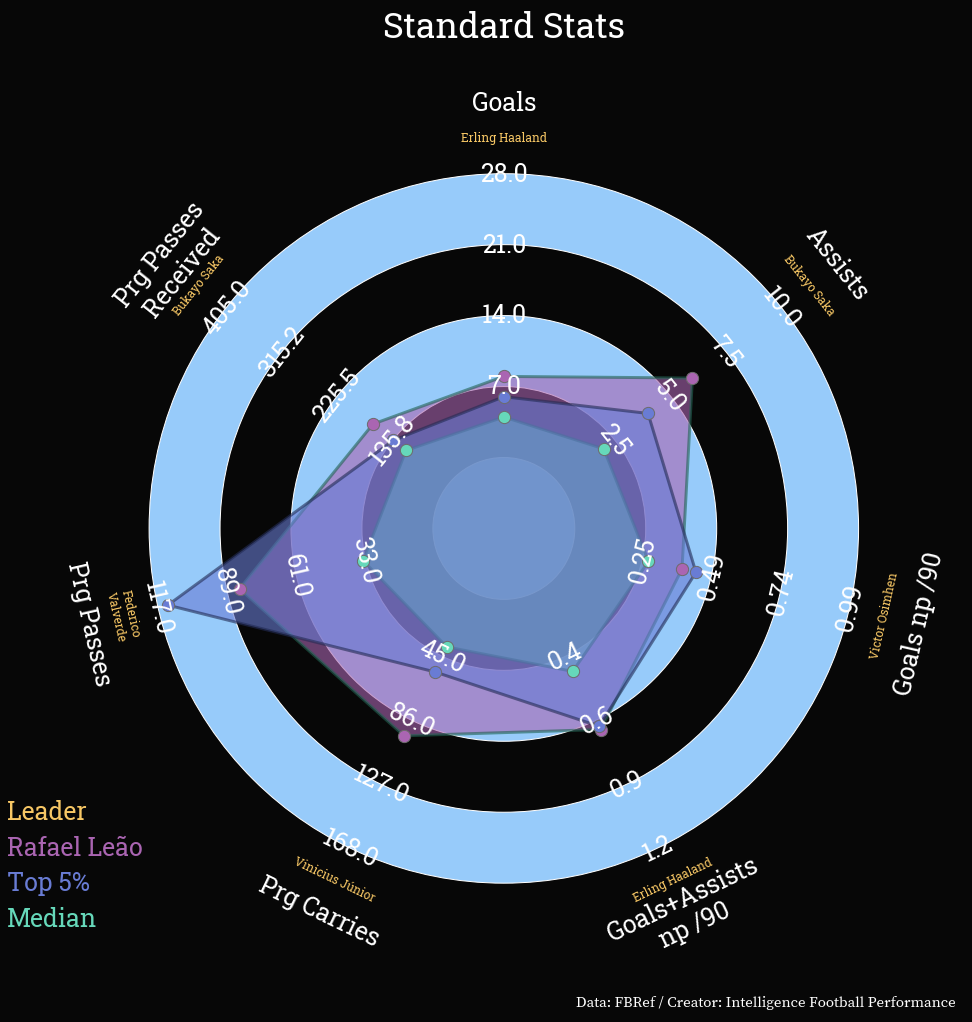

In [188]:
plot_radar(df_season, "Rafael Leão", "FW", standard_stats, name_mapping)

['Goals', 'Goals np /90', 'Shots /90', 'Shots on target /90', 'Goals per shot', 'Goals per shot on target', 'Avg shot distance', 'Goals - xGoal', 'np Goals - ngxGoal']
Rafael Leão played 1840 minutes in league this season.
1483 average minutes played a player in league this season.


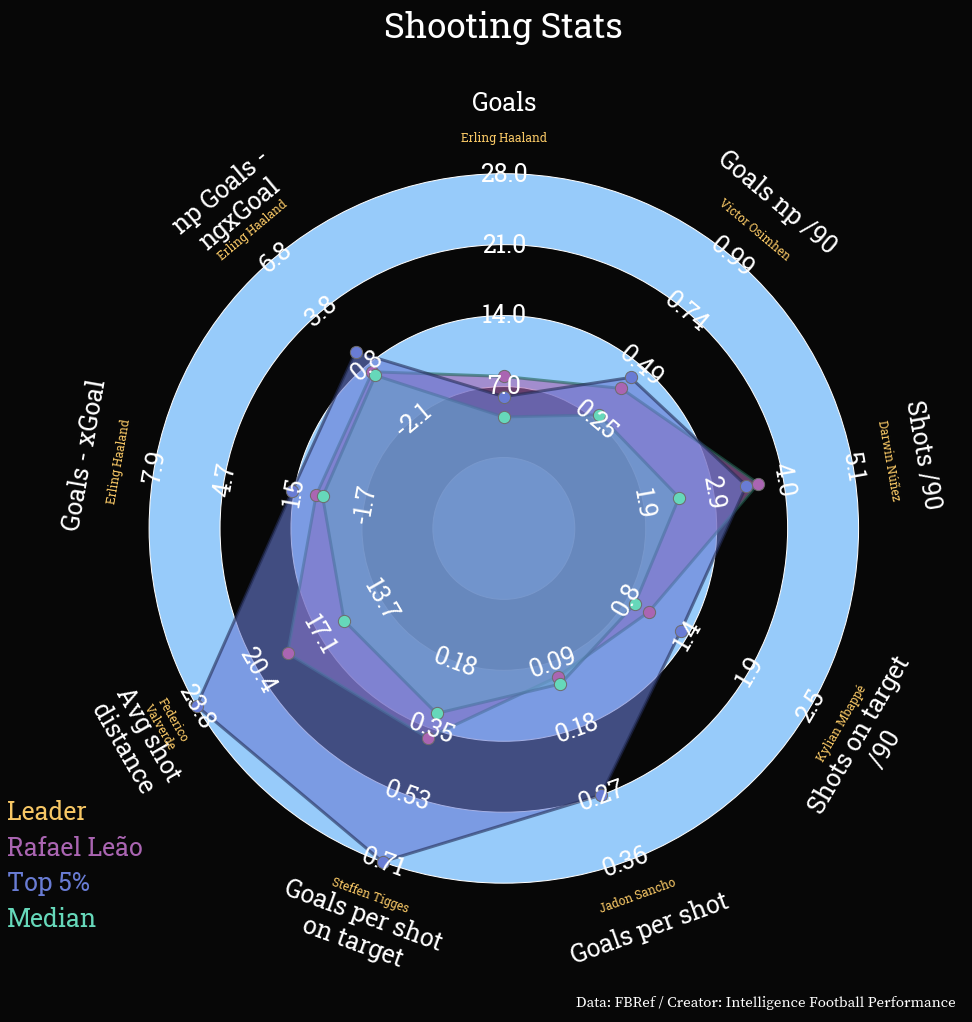

In [189]:
plot_radar(df_season, "Rafael Leão", "FW", shooting_stats, name_mapping)

['Completed', 'Attempted', '% Completed', 'Progressive Distance', 'Assists', 'xAssistedGoal', 'xAssist', 'Key Passes', 'Passes in final 1/3', 'Passes in box', 'Crosses', 'Crosses in box', 'Prg Passes']
Rafael Leão played 1840 minutes in league this season.
1483 average minutes played a player in league this season.


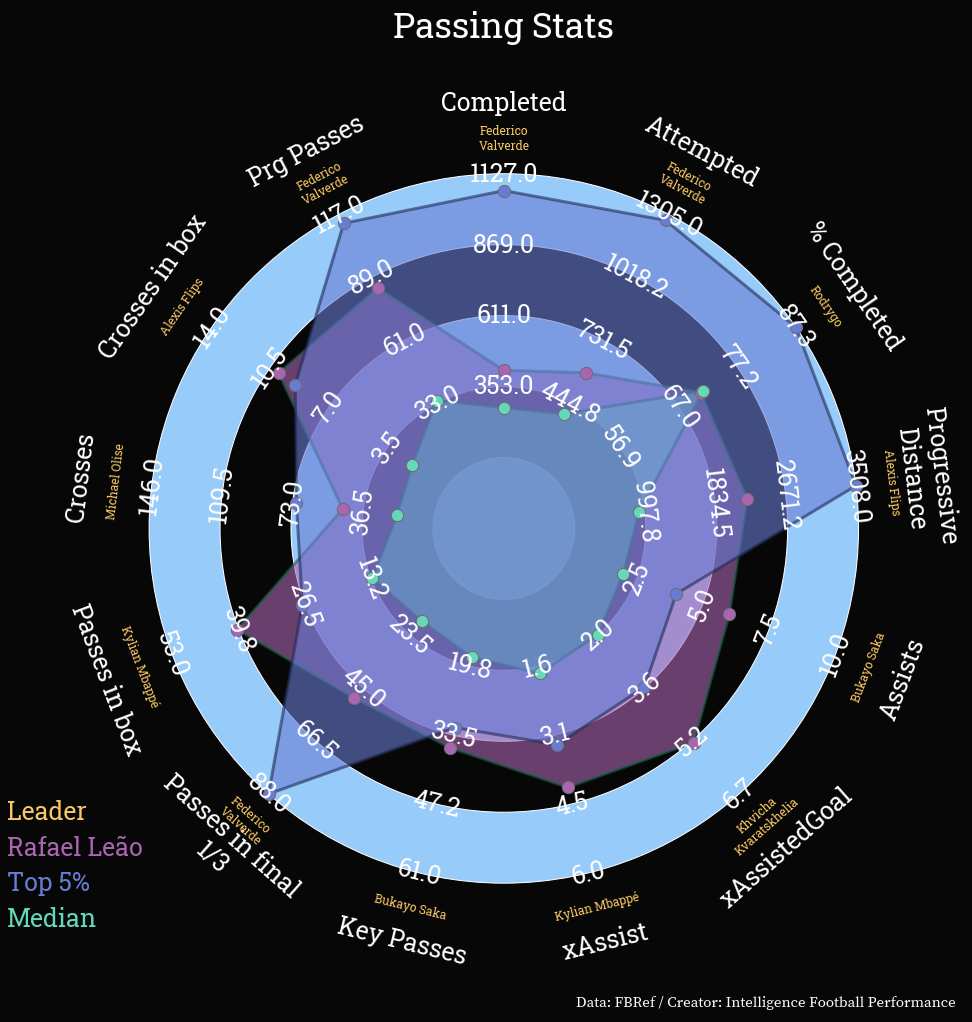

In [190]:
plot_radar(df_season, "Rafael Leão", "FW", passing_stats, name_mapping)

['Shot-Creating Action', 'Shot-Creating Action /90', 'PassLive to Goal', 'TakeOns to Shot', 'Shots', 'Goal-Creating Action', 'Goal-Creating Action /90']
Rafael Leão played 1840 minutes in league this season.
1483 average minutes played a player in league this season.


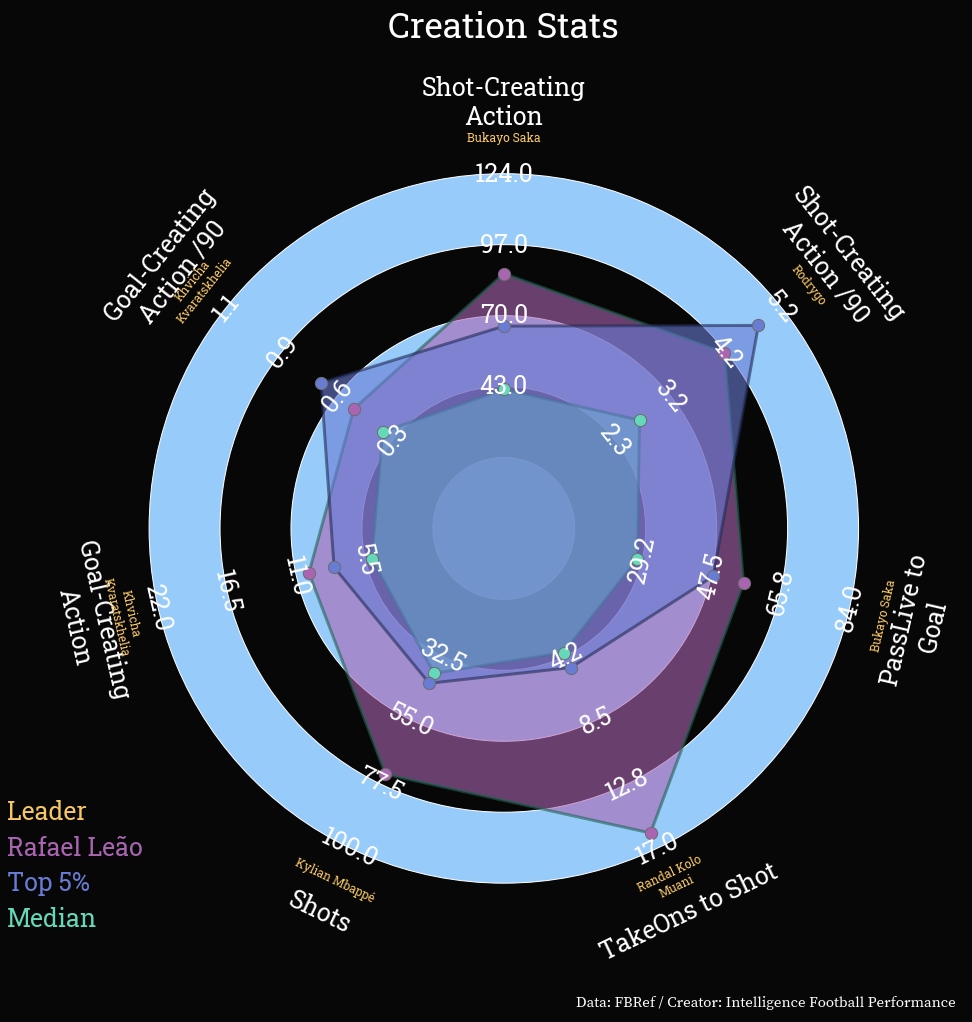

In [193]:
plot_radar(df_season, "Rafael Leão", "FW", creation_stats, name_mapping)

Rafael Leão played 1840 minutes in league this season.
1483 average minutes played a player in league this season.


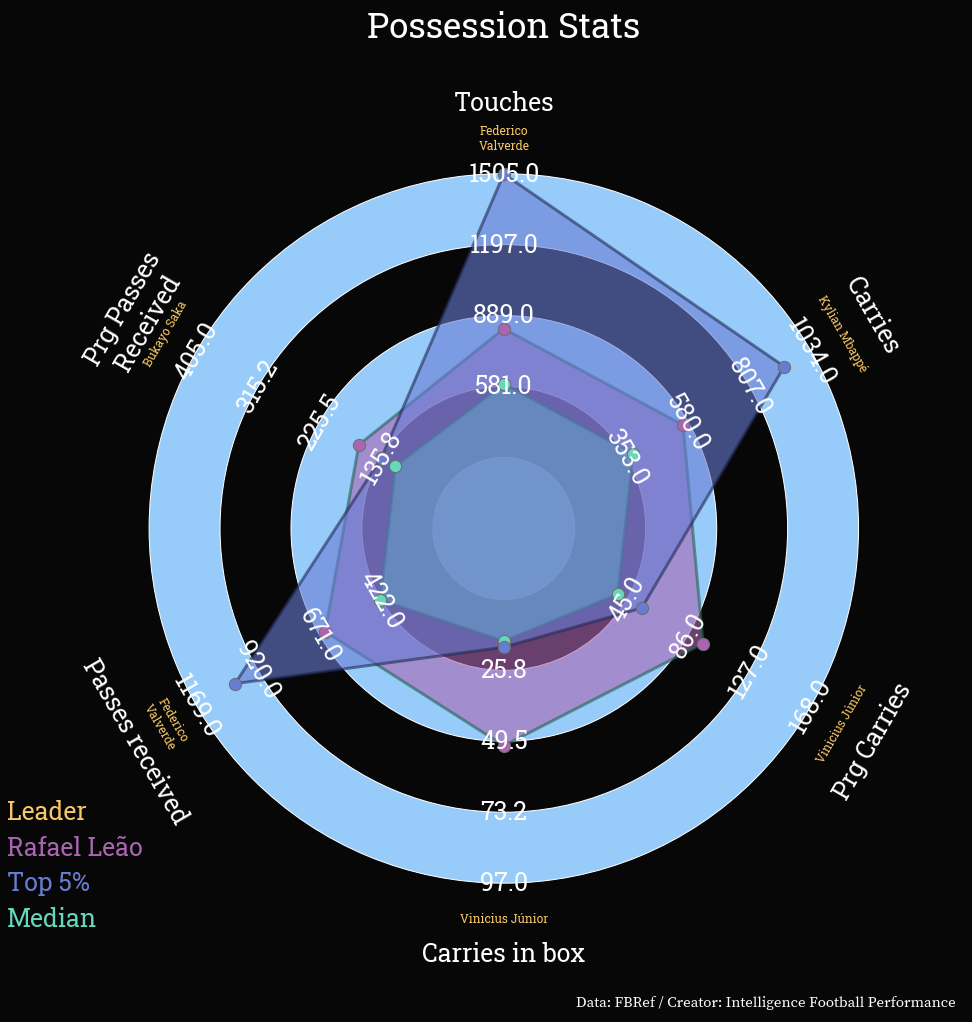

In [180]:
plot_radar(df_season, "Rafael Leão", "FW", possession_stats, name_mapping)